In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
df = pd.read_csv("scrabble-point-spread.csv")
df_2018 = pd.read_csv("ranked-players-with-scores.csv")
df_2013 = pd.read_csv("scrabble-tournament.csv")

In [3]:
merged = df.merge(df_2013, left_on='player_id', right_on='Player ID')
df = merged.head(50)

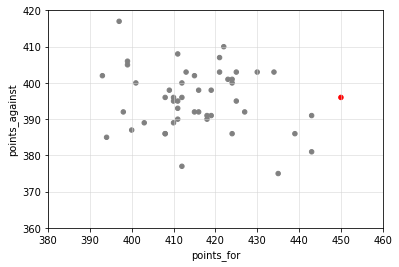

In [4]:
def build_colors(row):
    if row['points_for'] == 450:
        return 'red'
    else:
        return 'grey'

colors = df.reset_index().apply(build_colors, axis=1)

ax = df.plot(x='points_for', y='points_against', kind='scatter', color=colors)
ax.set_xlim([380, 460])
ax.set_ylim([360, 420])
ax.grid('on', which='major', linestyle='-', linewidth='0.5', color='lightgrey')
plt.savefig("FiveThirtyEight01.pdf")

In [5]:
df_2013.dtypes
df_2018

,current_rank,current_rating,games,losses,name,peak_rating,player_id,ties,total_prize_money,wins,points_for_against
0,1,2190,"1,765",426,David Gibson,2190,1384,5,"$174,982","1,325",433-370
1,2,2148,"1,070",386,Will Anderson,2148,19535,4,"$17,885",680,427-394
2,3,2130,"1,811",474,Nigel Richards,2307,6003,7,"$219,401","1,330",447-392
3,4,2092,744,241,Mack Meller,2092,20383,7,"$7,375",496,434-388
4,5,2081,"3,119","1,040",Ian Weinstein,2081,1847,17,"$34,858","2,062",425-382
5,6,2076,"4,272","1,357",Dave Wiegand,2236,728,14,"$124,964","2,881",444-395
6,7,2073,"1,177",444,Matthew Tunnicliffe,2073,17175,1,"$17,312",732,423-396
7,8,2048,"1,494",559,Rafi Stern,2082,2105,3,"$11,540",932,426-392
8,9,2043,"1,070",311,Eric Tran,2043,19216,2,"$5,649",757,430-376
9,10,2024,"1,225",448,Kenji Matsumoto,2069,583,3,"$19,805",774,426-395


In [6]:
merged_2 = df_2018.merge(df_2013, left_on='player_id', right_on='Player ID')

In [7]:
merged_2['Points for'] = merged_2['points_for_against'].str.extract(r'(\d+)-')
merged_2['Points against'] = merged_2['points_for_against'].str.extract(r'-(\d+)')
merged_2['Points for'] = merged_2['Points for'].astype(float)
merged_2['Points against'] = merged_2['Points against'].astype(float)
merged_2.dtypes

current_rank            int64
current_rating          int64
games                  object
losses                 object
name                   object
peak_rating             int64
player_id               int64
ties                    int64
total_prize_money      object
wins                   object
points_for_against     object
Byes                  float64
Credits               float64
Losses                  int64
Name                   object
New Rating              int64
Old Rating            float64
Other Money            object
Perf Rating           float64
Place                   int64
Player ID               int64
Prize Money            object
Seed                    int64
Spread                  int64
Ties                  float64
Tournament ID           int64
Wins                    int64
division               object
Points for            float64
Points against        float64
dtype: object

In [8]:
merged_2.division.value_counts()

Division 1    70
Division 2    14
Division 3     4
Division 4     1
Name: division, dtype: int64

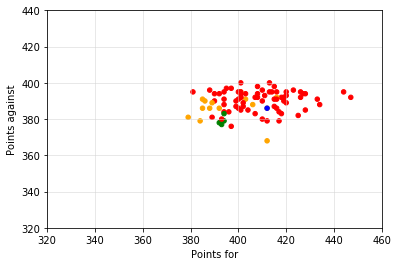

In [9]:
def build_colors(row):
    if row['division'] == 'Division 1':
        return 'red'
    elif row['division'] == 'Division 2':
        return 'orange'
    elif row['division'] == 'Division 3':
        return 'green'
    else:
        return 'blue'

colors = merged_2.reset_index().apply(build_colors, axis=1)
ax = merged_2.plot(x='Points for', y='Points against', kind='scatter', color=colors)
ax.set_xlim([320, 460])
ax.set_ylim([320, 440])
ax.grid('on', which='major', linestyle='-', linewidth='0.5', color='lightgrey')
plt.savefig("FiveThirtyEight02.pdf")



In [10]:
merged_2

,current_rank,current_rating,games,losses,name,peak_rating,player_id,ties,total_prize_money,wins,...,Player ID,Prize Money,Seed,Spread,Ties,Tournament ID,Wins,division,Points for,Points against
0,2,2148,"1,070",386,Will Anderson,2148,19535,4,"$17,885",680,...,19535,"$2,000",2,1623,NaN,8163,23,Division 1,427.0,394.0
1,3,2130,"1,811",474,Nigel Richards,2307,6003,7,"$219,401","1,330",...,6003,"$10,000",1,1934,NaN,8163,24,Division 1,447.0,392.0
2,4,2092,744,241,Mack Meller,2092,20383,7,"$7,375",496,...,20383,$600,9,397,1.0,8163,20,Division 1,434.0,388.0
3,5,2081,"3,119","1,040",Ian Weinstein,2081,1847,17,"$34,858","2,062",...,1847,NaN,3,638,NaN,8163,19,Division 1,425.0,382.0
4,6,2076,"4,272","1,357",Dave Wiegand,2236,728,14,"$124,964","2,881",...,728,$250,12,1153,NaN,8163,19,Division 1,444.0,395.0
5,7,2073,"1,177",444,Matthew Tunnicliffe,2073,17175,1,"$17,312",732,...,17175,NaN,28,721,NaN,8163,17,Division 1,423.0,396.0
6,8,2048,"1,494",559,Rafi Stern,2082,2105,3,"$11,540",932,...,2105,$500,3,960,NaN,8163,20,Division 1,426.0,392.0
7,10,2024,"1,225",448,Kenji Matsumoto,2069,583,3,"$19,805",774,...,583,$800,5,1671,NaN,8163,21,Division 1,426.0,395.0
8,11,2021,"4,375","1,622",Joey Mallick,2048,33,14,"$45,679","2,739",...,33,NaN,16,-47,NaN,8163,17,Division 1,420.0,389.0
9,15,2012,967,351,Noah Walton,2063,18474,1,"$7,790",615,...,18474,"$1,000",8,1628,NaN,8163,22,Division 1,428.0,385.0
